In [3]:
# prompt: lire les fichier  de ventes et regrouper en un seul fichier

import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os



In [7]:
# prompt: comment generaliser pour tous les fichier


def process_sales_data(filepath):
    """
    Reads a sales data CSV file, performs analysis, and generates visualizations.

    Args:
      filepath: The path to the sales data CSV file.
    """
    try:
        d1 = pd.read_csv(filepath)
        # Add your analysis and visualization code here.
        # Example: Print the first 5 rows of the dataframe
        print(d1.head())

    except FileNotFoundError:
        print(f"Error: File not found at {filepath}")
    except pd.errors.ParserError:
        print(f"Error: Could not parse the CSV file at {filepath}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")


# Example usage:
for filename in os.listdir("/content"):
    if filename.startswith("Sales_") and filename.endswith(".csv"):
        filepath = os.path.join("/content", filename)
        process_sales_data(filepath)

  Order ID                     Product Quantity Ordered Price Each  \
0   162009                      iPhone                1        700   
1   162009    Lightning Charging Cable                1      14.95   
2   162009            Wired Headphones                2      11.99   
3   162010  Bose SoundSport Headphones                1      99.99   
4   162011      34in Ultrawide Monitor                1     379.99   

       Order Date                      Purchase Address  
0  03/28/19 20:59       942 Church St, Austin, TX 73301  
1  03/28/19 20:59       942 Church St, Austin, TX 73301  
2  03/28/19 20:59       942 Church St, Austin, TX 73301  
3  03/17/19 05:39  261 10th St, San Francisco, CA 94016  
4  03/10/19 00:01  764 13th St, San Francisco, CA 94016  
  Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
1      NaN                         NaN              NaN        NaN   
2   176559  Bose Soun

In [8]:
# prompt: enregistrer dans un seul data.csv

def process_sales_data(directory):
    """
    Combines multiple sales data CSV files into a single 'data.csv' file.

    Args:
      directory: The directory containing the sales data CSV files.
    """
    all_data = []
    for filename in os.listdir(directory):
        if filename.startswith("Sales_") and filename.endswith(".csv"):
            filepath = os.path.join(directory, filename)
            try:
                df = pd.read_csv(filepath)
                all_data.append(df)
            except FileNotFoundError:
                print(f"Error: File not found at {filepath}")
            except pd.errors.ParserError:
                print(f"Error: Could not parse the CSV file at {filepath}")
            except Exception as e:
                print(f"An unexpected error occurred while reading {filename}: {e}")

    if all_data:
        combined_df = pd.concat(all_data, ignore_index=True)
        try:
            combined_df.to_csv("data.csv", index=False)  # Save to data.csv
            print("Combined data saved to data.csv")
        except Exception as e:
            print(f"An unexpected error occurred while saving data.csv: {e}")
    else:
        print("No matching sales data files found.")


# Example usage:
process_sales_data("/content") # Assuming your CSV files are in /content

Combined data saved to data.csv


In [9]:
df = pd.read_csv("data.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [12]:
df.isnull().sum()

,0
Order ID,545
Product,545
Quantity Ordered,545
Price Each,545
Order Date,545
Purchase Address,545


In [13]:
#Supprimer les valeurs nuls
df.dropna(inplace=True)


In [15]:

#Verification des types de donnees
df.dtypes

,0
Order ID,object
Product,object
Quantity Ordered,object
Price Each,object
Order Date,object
Purchase Address,object


In [18]:
#Verifier la taille du df
df.shape


(186305, 6)

In [21]:
#Un fonction pour extraire le mois
def month(x):
  return x.split('/')[0]

#Recuperer la colonne Order Date

df['Month'] = df['Order Date'].apply(month)


In [23]:
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03


In [24]:
df['Month'].unique()

array(['03', '04', 'Order Date', '05', '09', '10', '01', '02', '11', '12',
       '07', '08', '06'], dtype=object)

In [30]:
# Orderles colonnes du mois en supprimer  order Date
df = df[df['Month'] != 'Order Date' ]
df['Month'].unique()

array(['03', '04', '05', '09', '10', '01', '02', '11', '12', '07', '08',
       '06'], dtype=object)

In [31]:
# Changer le type des mois de object en int

df['Month'] = df['Month'].astype(int)
df.dtypes

,0
Order ID,object
Product,object
Quantity Ordered,object
Price Each,object
Order Date,object
Purchase Address,object
Month,int64


In [34]:
df['Price Each']=df['Price Each'].astype(float)
df['Quantity Ordered']=df['Quantity Ordered'].astype(int)


In [35]:
# Creer une nouvelle colonne Sales

df['Sales'] = df['Price Each'] * df['Quantity Ordered']


In [36]:
df.groupby('Month')['Sales'].sum()

,Sales
Month,
1,1822256.73
2,2202022.42
3,2807100.38
4,3390670.24
5,3152606.75
6,2577802.26
7,2647775.76
8,2244467.88
9,2097560.13


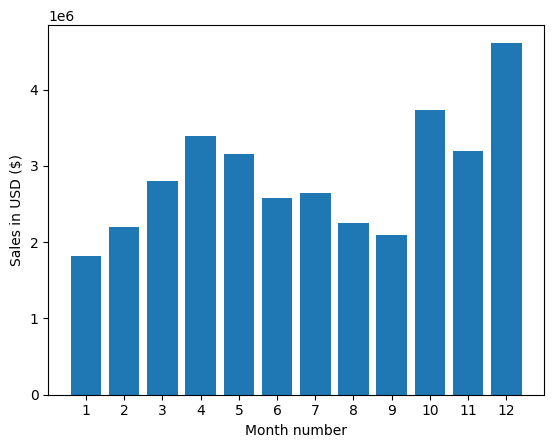

In [37]:

# Visualisation des ventes
months = range(1,13)
plt.bar(months,df.groupby('Month')['Sales'].sum())
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

In [38]:
def city(x):
  return x.split(',')[1]

df['City'] = df['Purchase Address'].apply(city)


In [41]:
df.groupby('City')['City'].count()

,City
City,
Atlanta,14881
Austin,9905
Boston,19934
Dallas,14820
Los Angeles,29605
New York City,24876
Portland,12465
San Francisco,44732
Seattle,14732


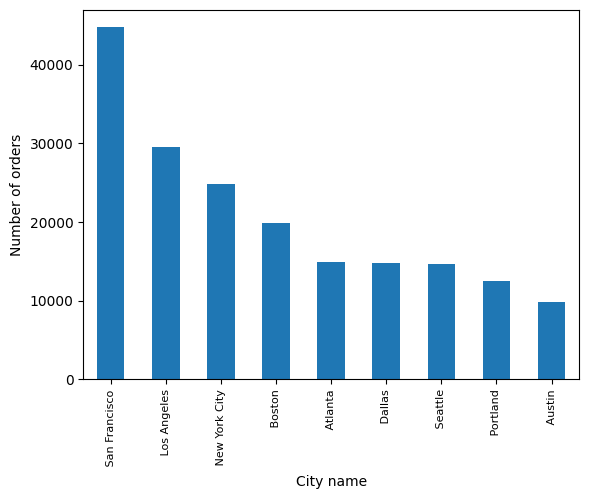

In [42]:
# Visualisation des commandes par ville
df['City'].value_counts().plot(kind='bar')
plt.ylabel('Number of orders')
plt.xlabel('City name')
plt.xticks(rotation='vertical', size=8)

plt.show()



In [44]:
# Fonction pour recuper heure sur la colonne order date

df['Hour'] = pd.to_datetime(df['Order Date']).dt.hour
df


<ipython-input-44-4ea75d79b0aa>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Order Date']).dt.hour


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Order Hour,Hour
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,700.00,Austin,20,20
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,14.95,Austin,20,20
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,23.98,Austin,20,20
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",3,99.99,San Francisco,5,5
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",3,379.99,San Francisco,0,0
...,...,...,...,...,...,...,...,...,...,...,...
186845,278792,AA Batteries (4-pack),1,3.84,10/12/19 04:32,"920 Adams St, San Francisco, CA 94016",10,3.84,San Francisco,4,4
186846,278793,Wired Headphones,1,11.99,10/28/19 22:00,"161 Chestnut St, Los Angeles, CA 90001",10,11.99,Los Angeles,22,22
186847,278794,AA Batteries (4-pack),1,3.84,10/09/19 20:58,"346 Spruce St, San Francisco, CA 94016",10,3.84,San Francisco,20,20
186848,278795,iPhone,1,700.00,10/31/19 17:21,"291 Hill St, Seattle, WA 98101",10,700.00,Seattle,17,17


In [45]:
# prompt: supprimer la colonne Order Hour

# ... (Your existing code)

# Fonction pour recuper heure sur la colonne order date
#df['Hour'] = pd.to_datetime(df['Order Date']).dt.hour
#df

# Delete the 'Order Hour' column if it exists
if 'Order Hour' in df.columns:
    df = df.drop('Order Hour', axis=1)

# ... (Rest of your code)

In [62]:
keys = []
hours = []
for key, hour in df.groupby('Hour'):
  keys.append(key)
  hours.append(len(hour))









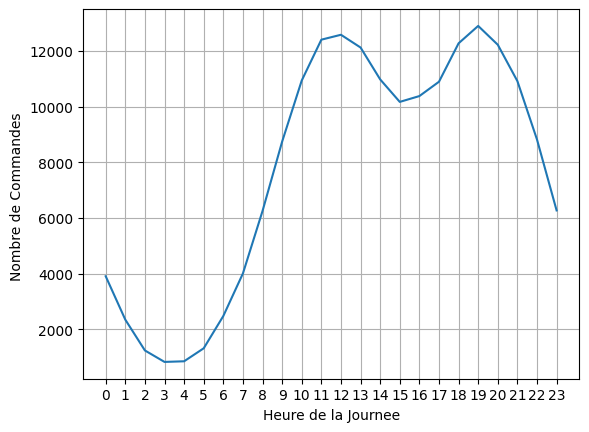

In [64]:
plt.grid()
plt.plot(keys,hours)
plt.xticks(keys)
plt.xlabel('Heure de la Journee')
plt.ylabel('Nombre de Commandes ')
plt.show()

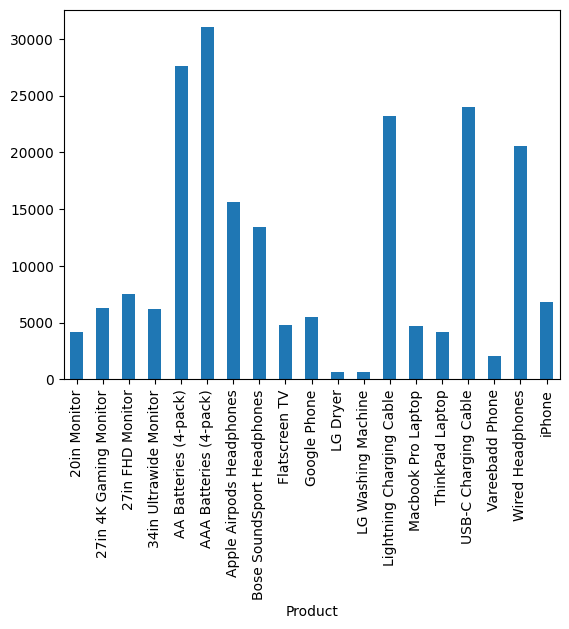

In [65]:
# Le produit le plus vendu
df.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar')
plt.show()

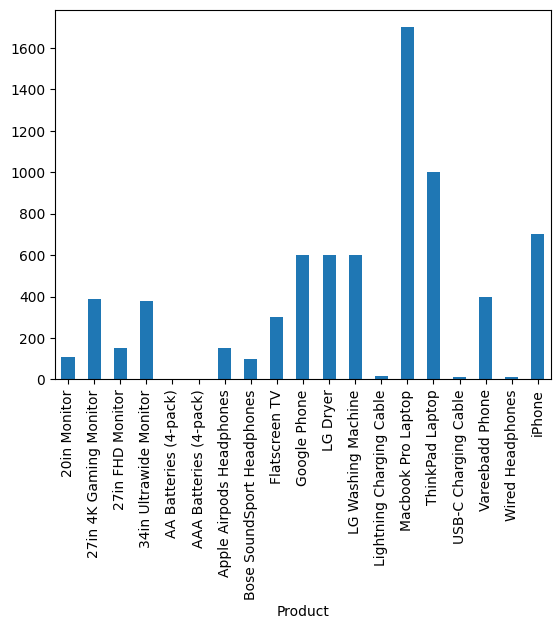

In [67]:
df.groupby('Product')['Price Each'].mean().plot(kind='bar')
plt.show()

In [69]:
products=df.groupby('Product')['Quantity Ordered'].sum().index

quantites=df.groupby('Product')['Quantity Ordered'].sum()
prices=df.groupby('Product')['Price Each'].mean()

<ipython-input-72-dbefa3e46d76>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products,rotation='vertical',size=8)


<Figure size 4000x2500 with 0 Axes>

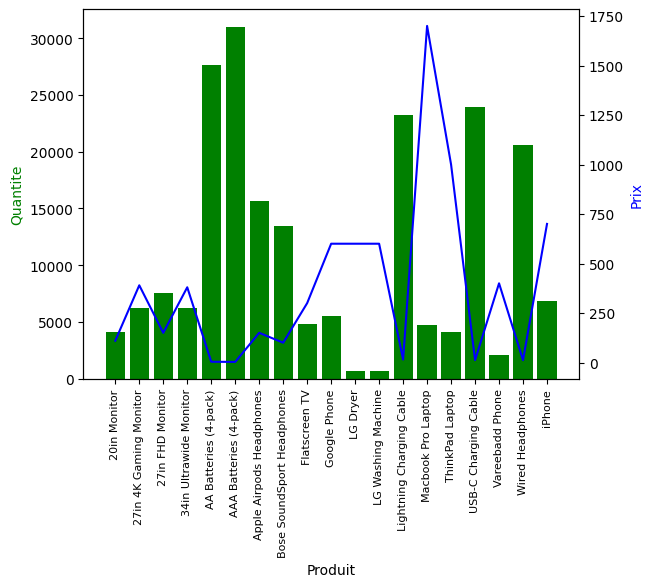

In [72]:
plt.figure(figsize=(40,25))
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products,quantites,color='g')
ax2.plot(products,prices,'b-')

ax1.set_xlabel('Produit')
ax1.set_ylabel('Quantite',color='g')
ax2.set_ylabel('Prix',color='b')
ax1.set_xticklabels(products,rotation='vertical',size=8)
plt.show()


In [75]:
# La combinaison de produit qui se vend plus
df1=df[df['Order ID'].duplicated(keep=False)]


In [76]:
df1['Grouped'] = df1.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


<ipython-input-76-aac07591b4f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Grouped'] = df1.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [78]:
df1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Grouped
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,700.00,Austin,20,"iPhone,Lightning Charging Cable,Wired Headphones"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,14.95,Austin,20,"iPhone,Lightning Charging Cable,Wired Headphones"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,23.98,Austin,20,"iPhone,Lightning Charging Cable,Wired Headphones"
30,162037,iPhone,1,700.00,03/23/19 02:11,"277 Elm St, Los Angeles, CA 90001",3,700.00,Los Angeles,2,"iPhone,Lightning Charging Cable"
31,162037,Lightning Charging Cable,1,14.95,03/23/19 02:11,"277 Elm St, Los Angeles, CA 90001",3,14.95,Los Angeles,2,"iPhone,Lightning Charging Cable"
...,...,...,...,...,...,...,...,...,...,...,...
186756,278706,USB-C Charging Cable,1,11.95,10/07/19 18:18,"942 11th St, San Francisco, CA 94016",10,11.95,San Francisco,18,"Google Phone,USB-C Charging Cable"
186760,278710,USB-C Charging Cable,1,11.95,10/13/19 19:05,"183 5th St, San Francisco, CA 94016",10,11.95,San Francisco,19,"USB-C Charging Cable,27in FHD Monitor"
186761,278710,27in FHD Monitor,1,149.99,10/13/19 19:05,"183 5th St, San Francisco, CA 94016",10,149.99,San Francisco,19,"USB-C Charging Cable,27in FHD Monitor"
186769,278718,USB-C Charging Cable,1,11.95,10/13/19 12:45,"479 Lincoln St, Atlanta, GA 30301",10,11.95,Atlanta,12,"USB-C Charging Cable,Bose SoundSport Headphones"


In [79]:
df2=df1.drop_duplicates(subset=['Order ID'])

In [80]:
df2

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Grouped
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",3,700.00,Austin,20,"iPhone,Lightning Charging Cable,Wired Headphones"
30,162037,iPhone,1,700.00,03/23/19 02:11,"277 Elm St, Los Angeles, CA 90001",3,700.00,Los Angeles,2,"iPhone,Lightning Charging Cable"
60,162066,AA Batteries (4-pack),1,3.84,03/13/19 13:57,"602 Pine St, New York City, NY 10001",3,3.84,New York City,13,"AA Batteries (4-pack),USB-C Charging Cable"
66,162071,Vareebadd Phone,1,400.00,03/30/19 20:23,"334 Jackson St, Atlanta, GA 30301",3,400.00,Atlanta,20,"Vareebadd Phone,USB-C Charging Cable"
78,162082,Vareebadd Phone,1,400.00,03/09/19 14:15,"401 Wilson St, New York City, NY 10001",3,400.00,New York City,14,"Vareebadd Phone,Wired Headphones"
...,...,...,...,...,...,...,...,...,...,...,...
186700,278653,iPhone,1,700.00,10/31/19 19:46,"949 Chestnut St, Atlanta, GA 30301",10,700.00,Atlanta,19,"iPhone,Lightning Charging Cable"
186745,278697,Wired Headphones,1,11.99,10/21/19 13:58,"621 North St, Los Angeles, CA 90001",10,11.99,Los Angeles,13,"Wired Headphones,27in 4K Gaming Monitor"
186755,278706,Google Phone,1,600.00,10/07/19 18:18,"942 11th St, San Francisco, CA 94016",10,600.00,San Francisco,18,"Google Phone,USB-C Charging Cable"
186760,278710,USB-C Charging Cable,1,11.95,10/13/19 19:05,"183 5th St, San Francisco, CA 94016",10,11.95,San Francisco,19,"USB-C Charging Cable,27in FHD Monitor"


<Axes: ylabel='count'>

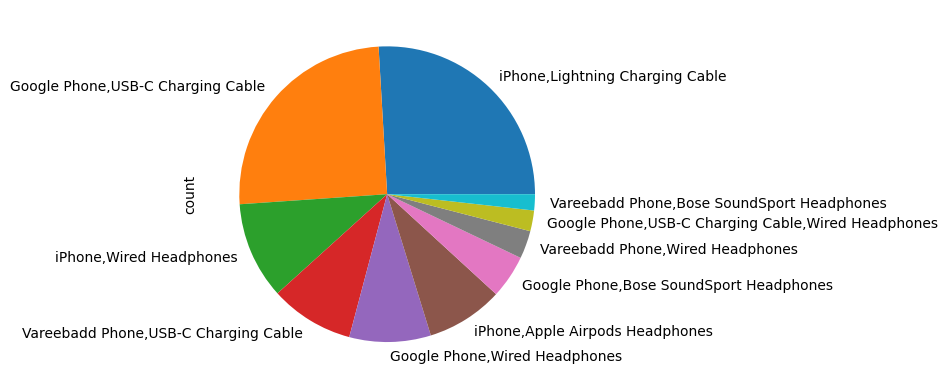

In [82]:
df2['Grouped'].value_counts()[0:10].plot.pie()

<ipython-input-83-a217d4a55e7f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Grouped'] = df1.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


Grouped
iPhone,Lightning Charging Cable                       882
Google Phone,USB-C Charging Cable                     856
iPhone,Wired Headphones                               361
Vareebadd Phone,USB-C Charging Cable                  312
Google Phone,Wired Headphones                         303
iPhone,Apple Airpods Headphones                       286
Google Phone,Bose SoundSport Headphones               161
Vareebadd Phone,Wired Headphones                      104
Google Phone,USB-C Charging Cable,Wired Headphones     77
Vareebadd Phone,Bose SoundSport Headphones             60
Name: count, dtype: int64


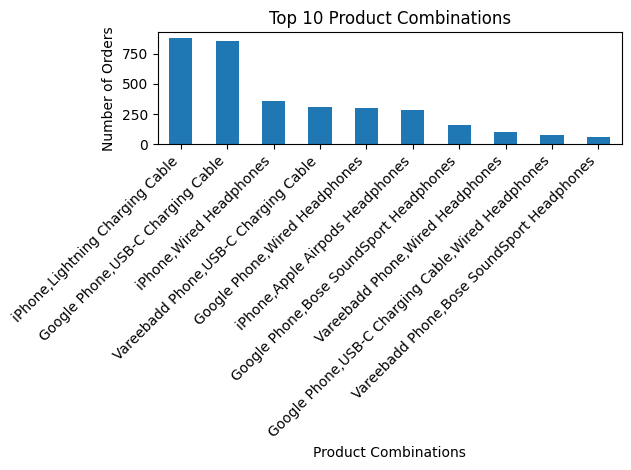

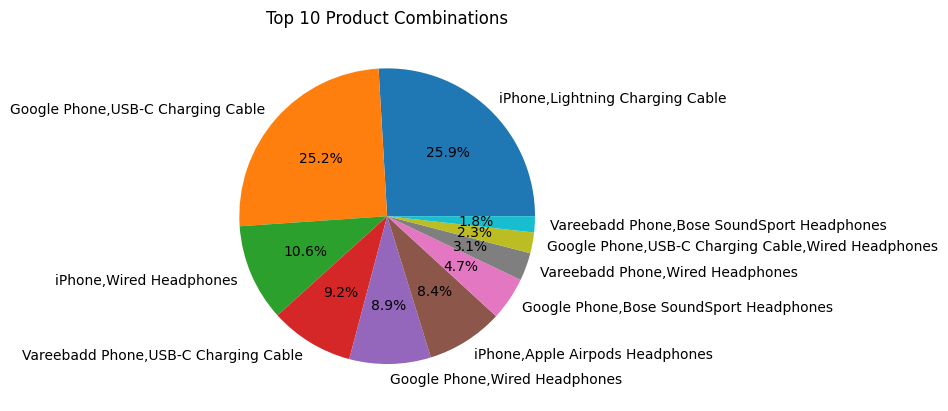

In [83]:
# prompt: combinaison de produit plus choisi

# ... (Your existing code)

# La combinaison de produit qui se vend plus
df1=df[df['Order ID'].duplicated(keep=False)]

df1['Grouped'] = df1.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df2=df1[['Order ID', 'Grouped']].drop_duplicates()

top_combinations = df2['Grouped'].value_counts().head(10)

print(top_combinations)

top_combinations.plot.bar()
plt.xlabel("Product Combinations")
plt.ylabel("Number of Orders")
plt.title("Top 10 Product Combinations")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Alternative visualization (Pie chart)
top_combinations.plot.pie(autopct='%1.1f%%')
plt.title("Top 10 Product Combinations")
plt.ylabel('') #Remove default y-axis label for pie charts
plt.show()